# Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.

There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output: Number of predicted wins (W)

Features

W - Win

R - Runs

AB - At Bat

H - Hit

2B - Double

3B - Triple

HR - Home Run

BB - Base on balls

SO - Strikeout

SB - Stolen Base

RA - Run Average

ER - Earned Run

ERA - Earned Run Average

CG - Complete Game

SHO - Shutout

SV - Save

E - Errors

# Importing Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import zscore,boxcox

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv('Baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

W (win) is the target column

In [5]:
df.shape

(30, 17)

There are 30 columns and 17 rows in the dataset

In [10]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


All the Columns except ERA(Earned Run Average) are integer data types.

There are no null values in any column

In [13]:
# Checking any null value presends in dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Exploratory Data Analysis

In [17]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observations:
    
There is a large difference between 75% and max value in columns R, SO and ER.

So there may be outliers in these columns

The Minimum value of the CG is 0, so we will treat as a null and remove it

In [18]:
# To remove the min value in Cg column
df['CG'].describe()

count    30.000000
mean      3.466667
std       2.763473
min       0.000000
25%       1.000000
50%       3.000000
75%       5.750000
max      11.000000
Name: CG, dtype: float64

In [19]:
df[df.CG==0]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
16,98,697,5631,1462,292,27,140,461,1322,98,596,532,3.21,0,13,54,122
22,71,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77


We will remove the three rows in CG and replace it with Median 

In [20]:
df["CG"] = df["CG"].replace(0, np.nan)
df["CG"] = df["CG"].fillna(df["CG"].median())  # imputing the missing value with median

In [21]:
df['CG'].describe()

count    30.000000
mean      3.766667
std       2.514555
min       1.000000
25%       2.000000
50%       3.000000
75%       5.750000
max      11.000000
Name: CG, dtype: float64

In [22]:
#Checking the Target Variable's unique values
df.W.unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [23]:
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

# Data Visualisation

### Uni Variant Analysis

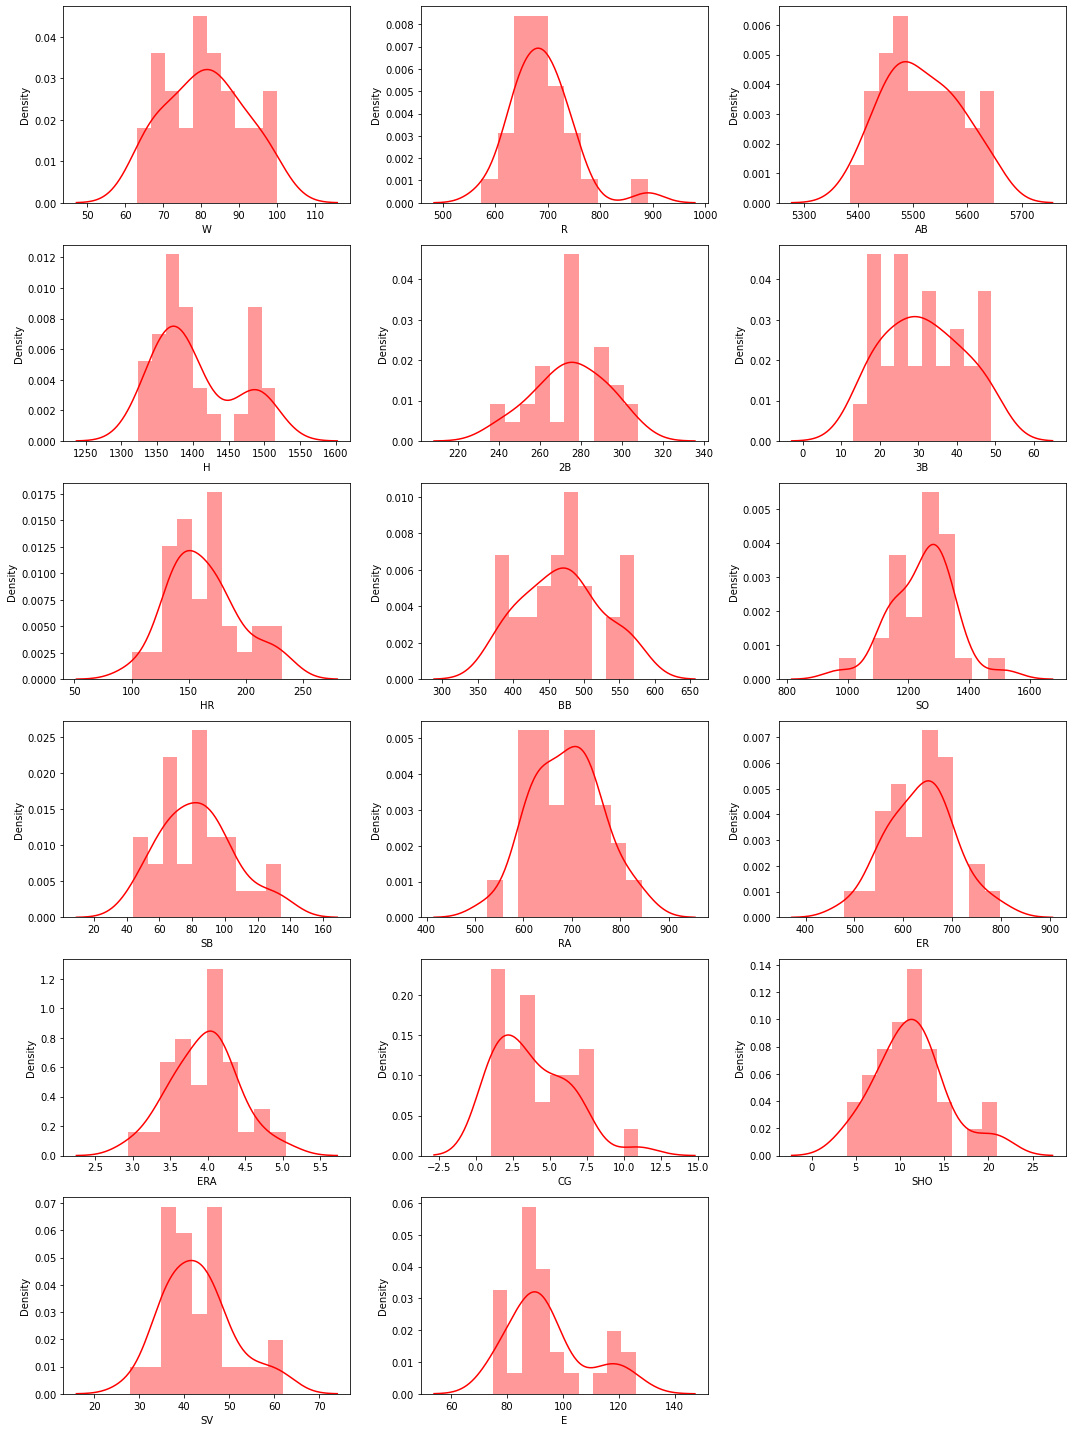

In [24]:
plt.figure(figsize=[15,20])
for i, column in enumerate(df.columns,1):
    plt.subplot(6,3,i)
    sns.distplot(df[column],bins=10,color='red')
    plt.tight_layout()
plt.show()

From the above Distribution Plots

There are some outliers present in R and CG. So we will remove outliers also.

we can see that data in H, R, CG, E, SV are right skewed. SO and SHO also have some skewness.

So we will remove skewness later.

### Bi Variate Analysis

Let's see how W (wins) are related with other variables, using regplot to understand relationship between features and result

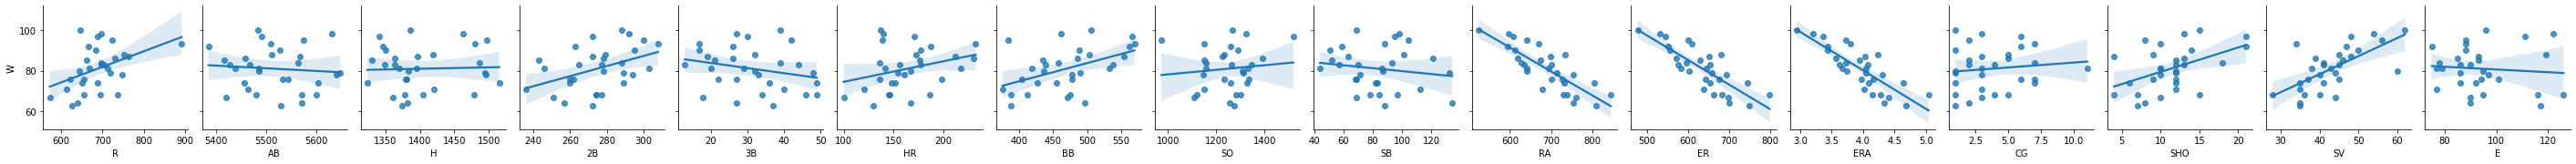

In [25]:
sns.pairplot(df,x_vars=['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'], y_vars='W',kind='reg')

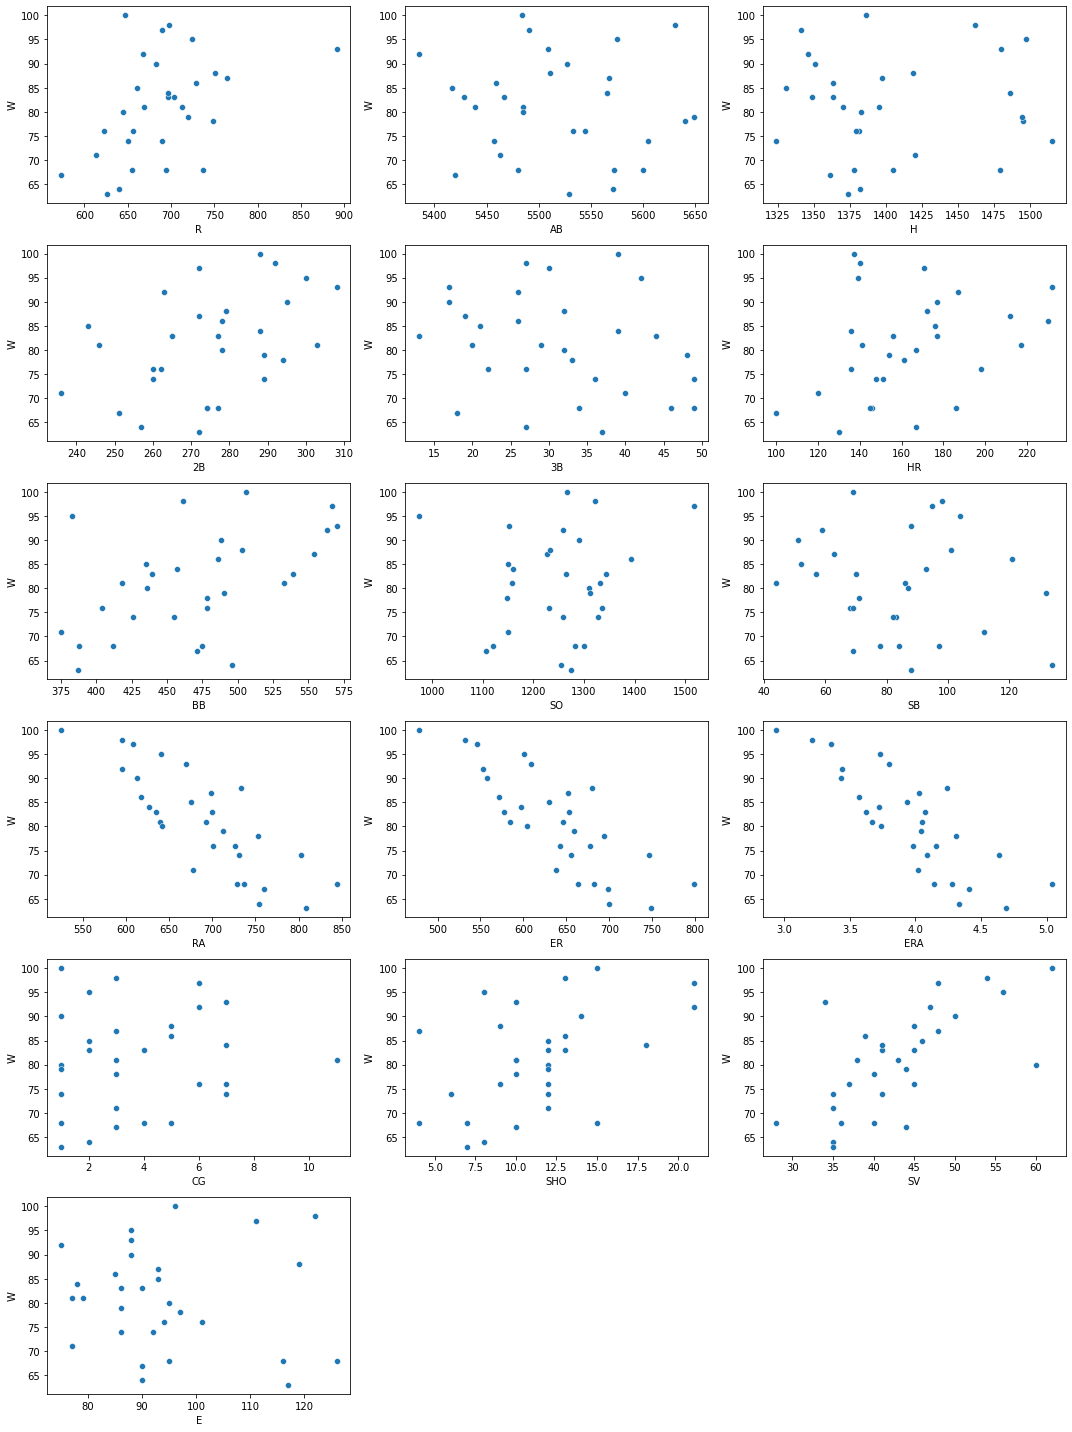

In [26]:
x_vars=['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
plt.figure(figsize=[15,20])
for i, column in enumerate(x_vars,1):
    plt.subplot(6,3,i)
    sns.scatterplot(df[column],df['W'])
    plt.tight_layout()
plt.show()

### Correlation check

In [27]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.116448,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.225817,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.071251,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.192408,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.222903,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.099579,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.154025,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.397719,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.079510,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.016529,-0.106563,-0.183418,0.079149


From the Correlation data we can observe that

1. R, 2B, BB, SHO and HR also has very good correlation with the target variable. So all these featueres heavily influences the target.

2. AB and E are least correlated and also negatively correlated with target variables.

3. Sv is most highly correlated with W(wins).

4. Also there are multicollinearity between the columns SB,ERA and ER. So we will do VIF to remove multicollinearity later.

<AxesSubplot:>

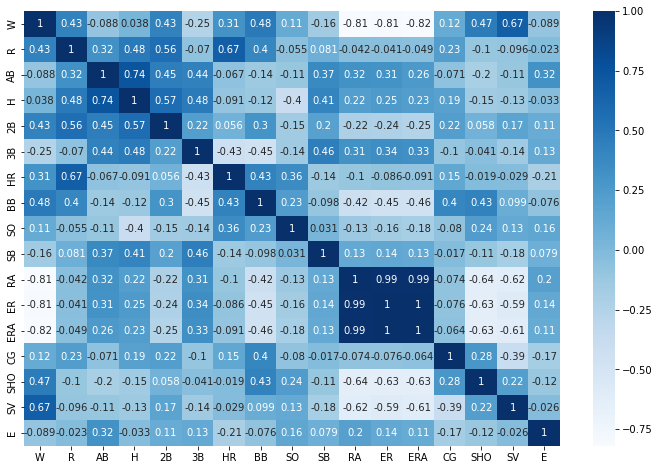

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

There is multicollinearity between the columns RA, ERA and ER.

So we will do VIF to remove multicollinearity later

### VIF - Variance Inflation Factor

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.drop('W', axis=1)
y=df['W']
x.head(2)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2.0,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2.0,12,45,86


In [30]:
x.shape[1]

16

In [32]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range (x.shape[1])]
    vif['features']=x.columns
    print(vif)
    
vif_calc()

      VIF Factor features
0    1620.235632        R
1    4285.248886       AB
2    5169.954580        H
3     781.248719       2B
4      32.522707       3B
5     284.793173       HR
6     243.371436       BB
7     398.990346       SO
8      29.112654       SB
9   17004.602753       RA
10  49912.347669       ER
11  23571.756675      ERA
12      7.841192       CG
13     30.181984      SHO
14    127.688838       SV
15     94.353021        E


Here, Lets drop VR as it has a high multicolinearity. and also we can see the RA and ERA also has a high multicollinearity

In [33]:
df.drop(['ER'],axis=1,inplace=True)
df.head(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,3.73,2.0,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,4.07,2.0,12,45,86


In [34]:
x=df.drop('W', axis=1)
y=df['W']
x.head(2)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,3.73,2.0,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,4.07,2.0,12,45,86


In [35]:
x.shape[1]

15

In [36]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range (x.shape[1])]
    vif['features']=x.columns
    print(vif)
    
vif_calc()

     VIF Factor features
0   1345.951262        R
1   3853.603434       AB
2   4397.159180        H
3    777.523364       2B
4     30.413455       3B
5    197.150727       HR
6    243.087725       BB
7    362.092977       SO
8     28.034934       SB
9   8371.823230       RA
10  6392.526694      ERA
11     7.829371       CG
12    29.768713      SHO
13   110.930214       SV
14    92.529895        E


by comparing still we have the high multicollinearity for RA and ERA. as RA has highest we'll drop RA

In [37]:
df.drop(['RA'],axis=1,inplace=True)
df.head(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2.0,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2.0,12,45,86


In [38]:
x=df.drop('W', axis=1)
y=df['W']
x.head(2)

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,3.73,2.0,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,4.07,2.0,12,45,86


In [39]:
x.shape[1]

14

In [41]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range (x.shape[1])]
    vif['features']=x.columns
    print(vif)
    
vif_calc()

     VIF Factor features
0   1338.246812        R
1   3853.061233       AB
2   4361.709612        H
3    758.386203       2B
4     30.256856       3B
5    191.862190       HR
6    218.475729       BB
7    316.824568       SO
8     27.281457       SB
9    376.305352      ERA
10     7.361389       CG
11    26.818763      SHO
12    92.308435       SV
13    76.697460        E


since H has the Highest Multicollinearity we will drop H

In [45]:
df.drop(['H'],axis=1,inplace=True)
df.head(2)

,W,R,AB,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,3.73,2.0,8,56,88
1,83,696,5467,277,44,156,439,1264,70,4.07,2.0,12,45,86


In [46]:
x=df.drop('W', axis=1)
y=df['W']
x.head(2)

,R,AB,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,724,5575,300,42,139,383,973,104,3.73,2.0,8,56,88
1,696,5467,277,44,156,439,1264,70,4.07,2.0,12,45,86


In [47]:
x.shape[1]

13

In [48]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range (x.shape[1])]
    vif['features']=x.columns
    print(vif)
    
vif_calc()

     VIF Factor features
0    838.280047        R
1   1800.349650       AB
2    746.826801       2B
3     30.236056       3B
4    154.248695       HR
5    188.167735       BB
6    303.522414       SO
7     22.400672       SB
8    333.689397      ERA
9      6.355738       CG
10    25.347803      SHO
11    82.579639       SV
12    64.962556        E


Now Checking for Skewness by continuing with this model

### Checking Skewness

In [50]:
x=df.drop('W', axis=1)
y=df['W']
x

,R,AB,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,724,5575,300,42,139,383,973,104,3.73,2.0,8,56,88
1,696,5467,277,44,156,439,1264,70,4.07,2.0,12,45,86
2,669,5439,303,29,141,533,1157,86,3.67,11.0,10,38,79
3,622,5533,260,27,136,404,1231,68,3.98,7.0,9,37,101
4,689,5605,289,49,151,455,1259,83,4.64,7.0,12,35,86
5,891,5509,308,17,232,570,1151,88,3.80,7.0,10,34,88
6,764,5567,272,19,212,554,1227,63,4.03,3.0,4,48,93
7,713,5485,246,20,217,418,1331,44,4.05,3.0,10,43,77
8,644,5485,278,32,167,436,1310,87,3.74,1.0,12,60,95
9,748,5640,294,33,161,478,1148,71,4.31,3.0,10,40,97


In [51]:
df.skew().sort_values(ascending=False)

R      1.200786
E      0.890132
CG     0.882400
SV     0.657524
SHO    0.565790
HR     0.516441
SB     0.479893
AB     0.183437
BB     0.158498
3B     0.129502
ERA    0.053331
W      0.047089
SO    -0.156065
2B    -0.230650
dtype: float64

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. 
A value between 0.5 and 1 or -0.5 and -1 is moderately skewed and 
A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

So here we can see columns E,CG,H,SV,SHO,HR are moderately skewed towards right.

In [52]:
# Applying log transformation and removing skewness
df=np.log(df)
df.skew()

W     -0.167715
R      0.744196
AB     0.161058
2B    -0.375624
3B    -0.441291
HR    -0.013351
BB    -0.051741
SO    -0.540955
SB    -0.168916
ERA   -0.319883
CG    -0.249008
SHO   -0.721953
SV     0.150582
E      0.630080
dtype: float64

#### Checking for Outliers

W         AxesSubplot(0.125,0.536818;0.0945122x0.343182)
R      AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
AB     AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
2B     AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
3B     AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
HR     AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
BB     AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
SO           AxesSubplot(0.125,0.125;0.0945122x0.343182)
SB        AxesSubplot(0.238415,0.125;0.0945122x0.343182)
ERA       AxesSubplot(0.351829,0.125;0.0945122x0.343182)
CG        AxesSubplot(0.465244,0.125;0.0945122x0.343182)
SHO       AxesSubplot(0.578659,0.125;0.0945122x0.343182)
SV        AxesSubplot(0.692073,0.125;0.0945122x0.343182)
E         AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

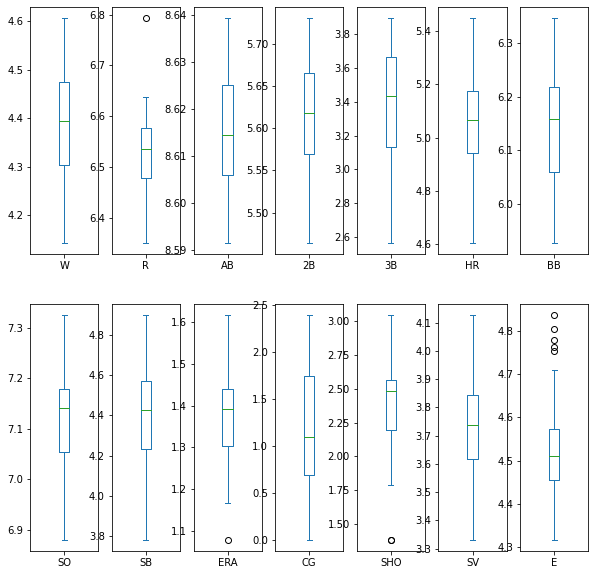

In [53]:
df.plot(kind='box',subplots=True,layout=(2,7),figsize=(10,10))

Here we can see that there are outliers present in E, SHO, R, ERA

### Removing Outliers

In [54]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z

,W,R,AB,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,1.309605,0.665385,0.850337,1.375821,0.999158,0.763654,1.630791,2.953147,0.940204,0.458347,0.534463,0.706315,1.578599,0.426629
1,0.256972,0.179624,0.708695,0.157941,1.130828,0.156480,0.493088,0.192242,0.513955,0.304132,0.534463,0.333457,0.337972,0.591448
2,0.066835,0.307662,1.117917,1.527746,0.049148,0.688477,1.124472,0.871047,0.242157,0.600089,1.796264,0.134087,0.621200,1.200122
3,0.429842,1.204801,0.247665,0.809094,0.251405,0.878472,1.185763,0.125773,0.620429,0.108683,1.178311,0.404273,0.772490,0.561190
4,0.637726,0.055130,1.278043,0.805459,1.435466,0.327905,0.194640,0.144595,0.111738,1.449767,1.178311,0.333457,1.087738,0.591448
5,1.143744,3.221588,0.098776,1.777643,1.560814,1.932027,1.684009,0.933550,0.326600,0.295836,1.178311,0.134087,1.252185,0.426629
6,0.623872,1.327690,0.735893,0.120179,1.246001,1.457625,1.446641,0.164899,0.900954,0.217805,0.019888,2.483817,0.704100,0.030431
7,0.066835,0.476828,0.446730,1.654199,1.100821,1.580295,0.901751,0.813130,2.219390,0.261075,0.019888,0.134087,0.080063,1.383961
8,0.030000,0.776717,0.446730,0.212962,0.229477,0.202082,0.550256,0.621952,0.284621,0.434946,1.482132,0.333457,1.969996,0.122113
9,0.227358,1.067026,1.774150,1.067359,0.316573,0.009537,0.216484,0.964923,0.461854,0.804920,0.019888,0.134087,0.330213,0.271480


In [55]:
z.shape

(30, 14)

In [56]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [57]:
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,4.553877,6.584791,8.626048,5.703782,3.737670,4.934474,5.948035,6.880384,4.644391,1.316408,0.693147,2.079442,4.025352,4.477337
1,4.418841,6.545350,8.606485,5.624018,3.784190,5.049856,6.084499,7.142037,4.248495,1.403643,0.693147,2.484907,3.806662,4.454347
2,4.394449,6.505784,8.601350,5.713733,3.367296,4.948760,6.278521,7.053586,4.454347,1.300192,2.397895,2.302585,3.637586,4.369448
3,4.330733,6.432940,8.618485,5.560682,3.295837,4.912655,6.001415,7.115582,4.219508,1.381282,1.945910,2.197225,3.610918,4.615121
4,4.304065,6.535241,8.631414,5.666427,3.891820,5.017280,6.120297,7.138073,4.418841,1.534714,1.945910,2.484907,3.555348,4.454347
6,4.465908,6.638568,8.624612,5.605802,2.944439,5.356586,6.317165,7.112327,4.143135,1.393766,1.098612,1.386294,3.871201,4.532599
7,4.394449,6.569481,8.609772,5.505332,2.995732,5.379897,6.035481,7.193686,3.784190,1.398717,1.098612,2.302585,3.761200,4.343805
8,4.382027,6.467699,8.609772,5.627621,3.465736,5.117994,6.077642,7.177782,4.465908,1.319086,0.000000,2.484907,4.094345,4.553877
9,4.356709,6.617403,8.637639,5.683580,3.496508,5.081404,6.169611,7.045777,4.262680,1.460938,1.098612,2.302585,3.688879,4.574711
10,4.477337,6.621406,8.614501,5.631212,3.465736,5.147494,6.220590,7.117206,4.615121,1.444563,1.609438,2.197225,3.806662,4.779123


In [58]:
df_new.shape

(29, 14)

In [59]:
# Percentage Data loss

loss_percent=(30-29)/30*100
print(loss_percent)

3.3333333333333335


there is a loss of 3.33% of Data

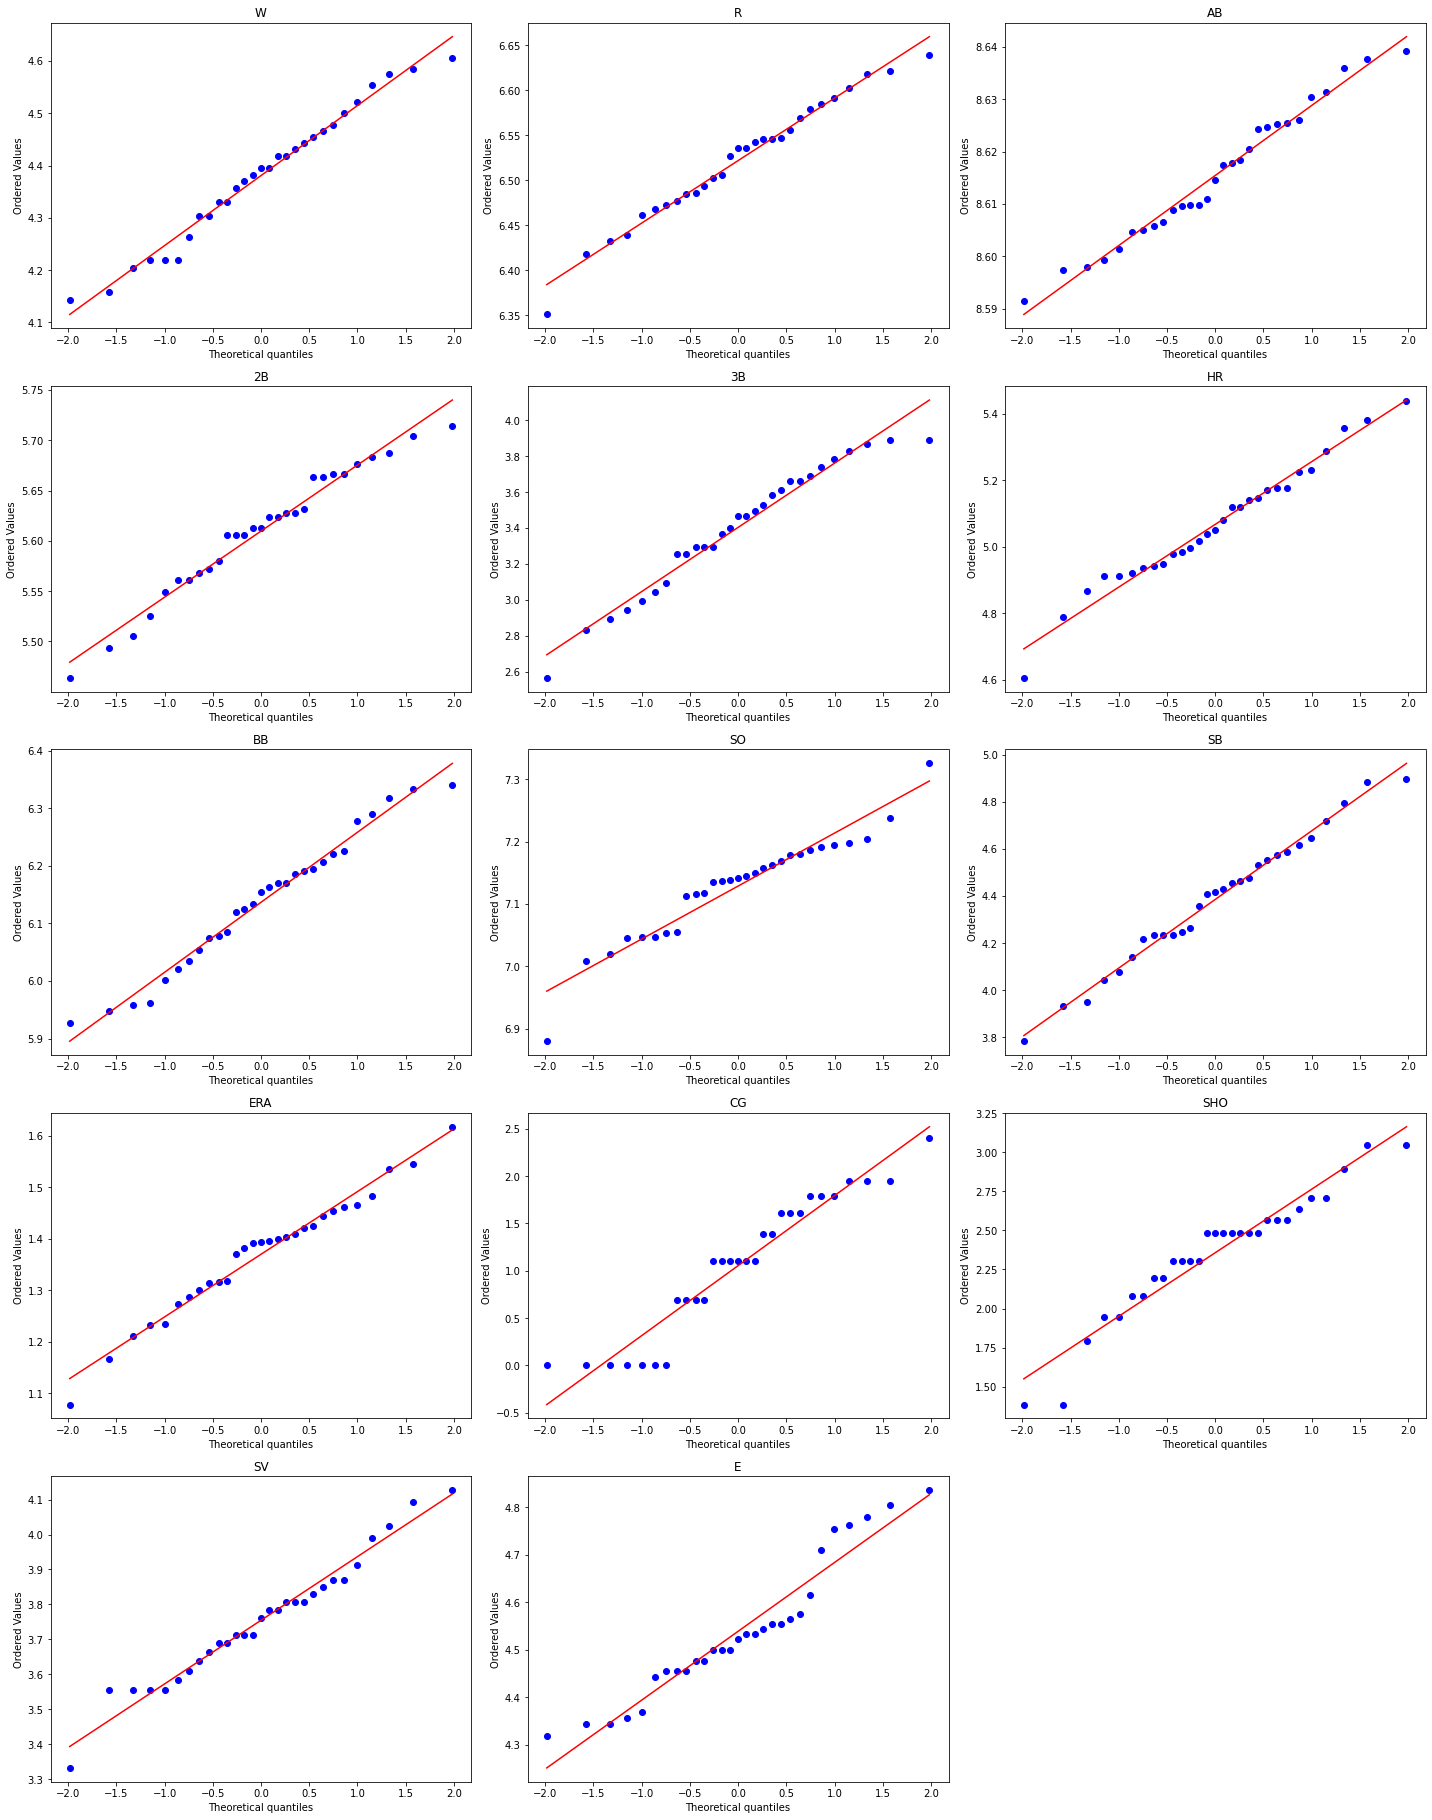

In [60]:
from scipy.stats import probplot
plt.figure(figsize=(20,30))
for i in range(14):
    plt.subplot(6,3,i+1)
    probplot(df_new[df.columns[i]],plot=plt,dist='norm')
    plt.title(df.columns[i])
    plt.tight_layout()

In [61]:
# sepratating data into train and test

x=df_new.drop('W', axis=1)
y=df_new['W']
x.head()

,R,AB,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,6.584791,8.626048,5.703782,3.737670,4.934474,5.948035,6.880384,4.644391,1.316408,0.693147,2.079442,4.025352,4.477337
1,6.545350,8.606485,5.624018,3.784190,5.049856,6.084499,7.142037,4.248495,1.403643,0.693147,2.484907,3.806662,4.454347
2,6.505784,8.601350,5.713733,3.367296,4.948760,6.278521,7.053586,4.454347,1.300192,2.397895,2.302585,3.637586,4.369448
3,6.432940,8.618485,5.560682,3.295837,4.912655,6.001415,7.115582,4.219508,1.381282,1.945910,2.197225,3.610918,4.615121
4,6.535241,8.631414,5.666427,3.891820,5.017280,6.120297,7.138073,4.418841,1.534714,1.945910,2.484907,3.555348,4.454347


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,R,AB,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.952705,0.832836,1.496870,0.971132,-0.734194,-1.627932,-2.980285,0.937199,-0.461370,-0.497589,-0.699206,1.552157,-0.435290
1,0.356694,-0.700250,0.228354,1.106395,-0.094649,-0.450290,0.159780,-0.495156,0.289427,-0.497589,0.323407,0.298007,-0.597850
2,-0.241188,-1.102661,1.655111,-0.105779,-0.655010,1.224055,-0.901710,0.249619,-0.600940,1.850871,-0.136422,-0.671621,-1.198180
3,-1.341945,0.240194,-0.778887,-0.313555,-0.855134,-1.167282,-0.157697,-0.600033,0.096973,1.228216,-0.402149,-0.824559,0.538988
4,0.203945,1.253424,0.902794,1.419345,-0.275214,-0.141365,0.112214,0.121156,1.417510,1.228216,0.323407,-1.143244,-0.597850
5,1.765329,0.720296,-0.061329,-1.335291,1.605512,1.557533,-0.196756,-0.876351,0.204423,0.060980,-2.447374,0.668125,-0.044524
6,0.721353,-0.442644,-1.659128,-1.186149,1.734721,-0.873299,0.779617,-2.175018,0.247030,0.060980,-0.136422,0.037287,-1.379499
7,-0.816701,-0.442644,0.285663,0.180449,0.283029,-0.509465,0.588762,0.291446,-0.438327,-1.452468,0.323407,1.947821,0.105930
8,1.445504,1.741274,1.175583,0.269921,0.080219,0.284192,-0.995427,-0.443835,0.782543,0.060980,-0.136422,-0.377462,0.253249
9,1.505989,-0.072035,0.342766,0.180449,0.446547,0.724127,-0.138215,0.831298,0.641613,0.764693,-0.402149,0.298007,1.698664


### Finding Best Random State

In [63]:
maxScore = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    if acc>maxScore:
        maxScore=acc
        maxRS=i
print('Best score is',maxScore,'on Random State',maxRS)

Best score is 0.9650153784292713 on Random State 75


In [64]:
# Make input and output variables into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=75,test_size=0.20)

In [65]:
# Checking train and test data size
print(x_train.shape,'\t',x_test.shape)

(23, 13) 	 (6, 13)


In [69]:
print(y_train.shape,'\t',y_test.shape)

(23,) 	 (6,)


In [66]:
# Importing models library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# Importing error metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
# Using algorithms via for loop

In [67]:
# Using algorithms via for loop

model=[LinearRegression(),Lasso(),Ridge(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor()]
for p in model:
    p.fit(x_train,y_train)
    print('Score of', p , 'is:' , p.score(x_train,y_train))
    predp=p.predict(x_test)
    print(f"test_score {p.score(x_test,y_test)}")
    print('Error:')
    print('Mean absolute error:', mean_absolute_error(y_test,predp))
    print('Mean squared error:', mean_squared_error(y_test,predp))
    print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predp)))
    print('r2_score:', r2_score(y_test,predp))
    print('********************************************************************************************')
    print('\n')

Score of LinearRegression() is: 0.9505469125920899
test_score 0.9610308611061624
Error:
Mean absolute error: 0.023502518732083644
Mean squared error: 0.0008081963500691985
Root Mean squared error: 0.028428794382970208
r2_score: 0.9610308611061624
********************************************************************************************


Score of Lasso() is: 0.0
test_score -0.003878626199812274
Error:
Mean absolute error: 0.1229371019586593
Mean squared error: 0.02081983499346632
Root Mean squared error: 0.14429080009988965
r2_score: -0.003878626199812274
********************************************************************************************


Score of Ridge() is: 0.9464451029660728
test_score 0.9656848238242289
Error:
Mean absolute error: 0.019875966720985794
Mean squared error: 0.0007116759806469667
Root Mean squared error: 0.026677255868004242
r2_score: 0.9656848238242289
********************************************************************************************


Score of S

We can see that Linear regression () has good r2 score and also Root mean squared error is less in Linear regression(). So we select that model

## Cross Validation of the Model

In [71]:
# Cross validate of DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=4,scoring='r2')
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

Score: [0.14134725 0.31421069 0.95017478 0.92030566]
Mean Score: 0.5815095952045656
Standard Deviation: 0.3591268558782986


### Using Ensemble Technique to boostup score

In [72]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=160)
rf.fit(x_train,y_train)
print('score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error:', mean_squared_error(y_test,predrf))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print('r2_score:', r2_score(y_test,predrf))

score: 0.9392668228408044


Mean absolute error: 0.07333556331546702
Mean squared error: 0.007146941453768921
Root Mean squared error: 0.08453958512891414


r2_score: 0.6553929572260497


In [73]:
from sklearn.ensemble import AdaBoostRegressor


ad=AdaBoostRegressor(base_estimator=lr,n_estimators=20,learning_rate=1.0,random_state=160)
ad.fit(x_train,y_train)
print('score:',ad.score(x_train,y_train))
predad=ad.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predad))
print('Mean squared error:', mean_squared_error(y_test,predad))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predad)))
print('\n')
print('r2_score:', r2_score(y_test,predad))

score: 0.9982429770631586


Mean absolute error: 0.023204547049645512
Mean squared error: 0.0007662820827873904
Root Mean squared error: 0.02768180056982187


r2_score: 0.9630518587303144


In [74]:
# Cross validate of AdaboostRegressor
from sklearn.model_selection import cross_val_score
score=cross_val_score(ad,x,y,cv=4,scoring='r2',verbose=1,n_jobs=-1)
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Score: [0.51074179 0.56990268 0.87971931 0.93593997]
Mean Score: 0.7240759389332705
Standard Deviation: 0.18600542972487896


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.4s finished


# Hyper Parameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV
# Choosing Ada Boost Regressor
fmod_param = {'n_estimators' : [50, 100, 150, 200],
              'learning_rate' : [0.001, 0.01, 0.1, 1],
              'loss' : ["linear", "square", "exponential"],
              'random_state' : [21, 42, 104, 111]
             }

In [76]:
GSCV = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=fmod_param,n_jobs=-1, verbose=1, cv=5)

In [77]:
%%time
GSCV.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Wall time: 27.9 s


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [21, 42, 104, 111]},
             verbose=1)

In [78]:
GSCV.best_params_

{'learning_rate': 1,
 'loss': 'linear',
 'n_estimators': 100,
 'random_state': 111}

In [79]:
Final_Model = AdaBoostRegressor(learning_rate=1, loss="linear", n_estimators=100, random_state=111)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

fmod_r2score=cross_val_score(Final_Model,x_train,y_train,cv=4)
fmod_r2=fmod_r2score.mean()
print('Cross Val score', fmod_r2*100)

R2 score for the Best Model is: 60.22375750826656
Cross Val score 53.709746471960706


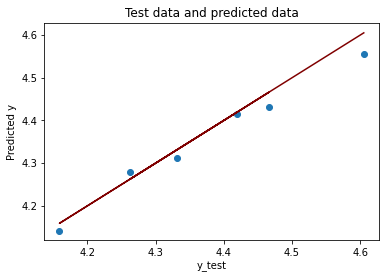

In [80]:
# Plotting scatter plot between test data and predicted data for AdaBoostRegressor
plt.scatter(y_test,predad)
plt.plot(y_test,y_test,color='maroon')
plt.xlabel('y_test')
plt.ylabel('Predicted y')
plt.title('Test data and predicted data')
plt.show()

## Model Saving

In [81]:
# Saving the AdaBoostRegressor
import pickle
filename='Baseball_win_prediction.pkl'
pickle.dump(ad,open(filename,'wb'))

In [82]:
#Conslusion
import pickle
loaded_model=pickle.load(open('Baseball_win_prediction.pkl','rb'))
result_v2=loaded_model.score(x_test,y_test)
print("Accuracy Score :",result_v2*100)

Accuracy Score : 96.30518587303143


# The End